In [1]:
"""
-  AFF     - Call rate    - nearby indel   - depth / coverage   - seg. dupl
"""
import pandas as pd
import scipy.stats
import numpy as np
import vcf
import io
import matplotlib.pyplot as plt

def removeoverlap(X, Y ):
    fragments=[]
    X['start'] = X["start"].astype(int)
    for i in range(len(list(Y.index))):
        start = list(Y['POS'])[i]
        end = list(Y['END'])[i]
        X2 = X.loc[(X["start"]<=start) | (X["start"]>=end)]
        X = 0; X = X2
    result = X
    return(result)


def removelowcallrate(Frame):
    Frame['Count0'] = Frame.isnull().sum(axis=1)
    Frame['Count1'] = Frame.isin({'./.:.'}).sum(1)
    Frame['New'] = 650 - Frame['Count0']                     #650 samples
    result = Frame.loc[Frame['Count1']<Frame['New']*0.2]     #Call rate 80%
    del result['Count0']
    del result['Count1']
    del Table['New']
    retun (result)
    
def countcall(X):
    # GT:GB   ------   ./.:0|0
    
    S = X.dropna().astype(str).copy()
    L = [x.split(':') for x in list(S) if x!='.']
    count_gb = len([x[1] for x in L if x[1]not in ['.','./.']])
    count_gn = len(L)
    return(count_gb)

SEGDUP="/storage/resources/dbase/human/hg19/hg19_segmentalduplications.bed"
HRUN = "/storage/resources/dbase/human/hg19/hg19.hipstr_reference_hrun.bed"
HPOL = "/storage/szfeupe/Runs/650GTEx_estr/temp_files/GTEX-111FC-0001"
SNP = "/storage/szfeupe/Runs/650GTEx_estr/SNP_Analysis/chr"
column = open('/storage/szfeupe/Runs/650GTEx_estr/SNP_Analysis/tmp','r').readline().split('\t')

In [2]:
sample1 = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Filter_Merged_STRs_All_Samples.vcf.gz', skiprows=132, sep='\t', low_memory=False)
COL = ['#CHROM','POS','ID','REF','ALT','QUAL','FILTER']
data = sample1[COL]
data['hom']=data['FILTER'].apply(lambda x: 1 if "HOM_POLY" in x else 0)
data['dup']=data['FILTER'].apply(lambda x: 1 if "SEGDUP" in x else 0)
data['hrn']=data['FILTER'].apply(lambda x: 1 if "HRUN" in x else 0)
data['hwe']=data['FILTER'].apply(lambda x: 1 if "HWE" in x else 0)
data['crt']=data['FILTER'].apply(lambda x: 1 if "CALLRATE" in x else 0)

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/pyth

In [3]:
print(data.shape[0], ' STRs were genotyped')
print(data.loc[data['hom']==1].shape[0], 'Homopolymers total')
print(data.loc[data['dup']==1].shape[0], 'overlaps with segmental duplication total')
print(data.loc[data['hrn']==1].shape[0], ' were filtered for homopolymer runs ')
print(data.loc[data['hwe']==1].shape[0], ' were filtered for HWE score <0.05 total')
print(data.loc[data['crt']==1].shape[0], ' were filtered for call rate <0.8 in total')
print(data.loc[data['FILTER']=='PASS'].shape[0], 'passed all filters in total')

#HET,Description="Heterozygosity less than 0.3">
##FILTER=<ID=HRUN,Description="Hrun greater than -1">
##FILTER=<ID=HWE,Description="HWE less than 0.05">
##FILTER=<ID=CALLRATE,Description="Callrate less than 0.8">
##FILTER=<ID=HOM_POLY,Description="Homopolymer locus">
##FILTER=<ID=SEGDUP
print(data.loc[data['crt']==1].shape[0] +data.loc[data['hwe']==1].shape[0]+data.loc[data['hrn']==1].shape[0]+ \
      data.loc[data['dup']==1].shape[0] , ' elliminated for hrun, seg dup overlaps, hwe or call rate')

1586494  STRs were genotyped
829370 Homopolymers total
79353 overlaps with segmental duplication total
38881  were filtered for homopolymer runs 
174278  were filtered for HWE score <0.05 total
719899  were filtered for call rate <0.8 in total
81860 passed all filters in total
1012411  elliminated for hrun, seg dup overlaps, hwe or call rate


done


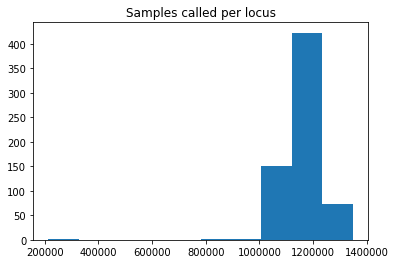

In [7]:
#Call counts
sample1.index = list(sample1['ID'])
sample = sample1[sample1.columns[9:]].copy()
sample.loc['calls']=sample.apply(lambda col: countcall(col), axis=0)
#histogram
print('done')
plt.hist(sample.loc['calls'])
plt.title('Samples called per locus')
plt.show()

In [9]:
1586494  STRs were genotyped
******0 Homopolymers total
79353 overlaps with segmental duplication total
38881  were filtered for homopolymer runs 
174278  were filtered for HWE score <0.05 total
719899  were filtered for call rate <0.8 in total
********175226 passed all filters in total
1012411  removed for hrun, seg dup overlaps, hwe or call rate.... there may be overlaps

574083